In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
df = pd.read_excel('/content/drive/MyDrive/Enhanced.xls')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('Enhanced_Misaghi.xls')

In [3]:
x = df[['X', 'Y', 'Z', 'Au']]

In [4]:
x

,X,Y,Z,Au
0,588916.5036,3920681.738,1576.0343,3.540
1,588916.5036,3920681.738,1576.0343,0.156
2,588912.8198,3920681.310,1576.1292,0.144
3,588912.8198,3920681.310,1576.1292,0.096
4,588910.1704,3920681.063,1575.9898,0.060
...,...,...,...,...
1357,588907.0000,3920658.200,1568.5000,0.036
1358,588909.7000,3920657.700,1568.4000,0.028
1359,588909.7000,3920657.700,1568.4000,0.048
1360,588912.8000,3920657.700,1568.4000,0.040


In [5]:
x = x[['X', 'Y', 'Z']].to_numpy()

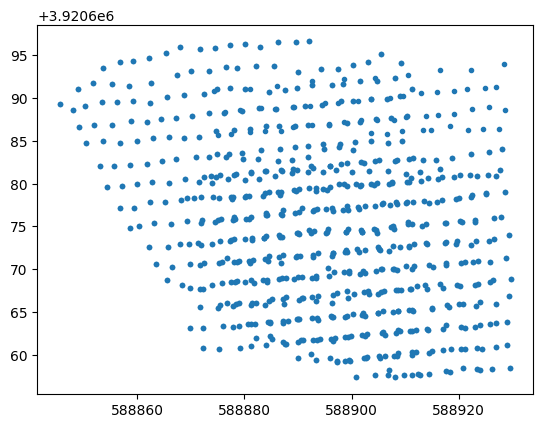

In [6]:
plt.plot(x[:, 0], x[:, 1], '.')

In [7]:
df.dropna(inplace=True)

In [8]:
from sklearn.model_selection import KFold
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [9]:
y = df['Au'].to_numpy()
X = df.drop(['Au'], axis=1).to_numpy()

In [10]:
cv = KFold()
acc_train = 0
acc_valid = 0
for idx_train, idx_valid in cv.split(X):
    X_train = X[idx_train]
    y_train = y[idx_train]
    X_valid = X[idx_valid]
    y_valid = y[idx_valid]
    model = VotingClassifier([('DT', DecisionTreeClassifier(max_depth= 3)),
                              ('SVC', SVC(C= 100, kernel= 'rbf', probability= 'true')),
                              ('LR', LogisticRegression())], voting= 'soft')
    model.fit(X_train, y_train)
    acc_train += model.score(X_train, y_train)
    acc_valid += model.score(X_valid, y_valid)
print(acc_train / 5)
print(acc_valid / 5)



ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [11]:
print(np.unique(y))


[-4.00000000e-03  0.00000000e+00  4.00000000e-03  8.00000000e-03
  1.20000000e-02  1.60000000e-02  2.00000000e-02  2.40000000e-02
  2.80000000e-02  3.20000000e-02  3.60000000e-02  4.00000000e-02
  4.40000000e-02  4.80000000e-02  5.20000000e-02  5.60000000e-02
  6.00000000e-02  6.40000000e-02  6.80000000e-02  7.20000000e-02
  7.60000000e-02  8.00000000e-02  8.40000000e-02  8.80000000e-02
  9.20000000e-02  9.60000000e-02  1.00000000e-01  1.04000000e-01
  1.08000000e-01  1.12000000e-01  1.16000000e-01  1.20000000e-01
  1.24000000e-01  1.28000000e-01  1.32000000e-01  1.36000000e-01
  1.40000000e-01  1.44000000e-01  1.48000000e-01  1.52000000e-01
  1.56000000e-01  1.60000000e-01  1.64000000e-01  1.68000000e-01
  1.70000000e-01  1.72000000e-01  1.76000000e-01  1.80000000e-01
  1.84000000e-01  1.88000000e-01  1.92000000e-01  1.96000000e-01
  2.00000000e-01  2.04000000e-01  2.08000000e-01  2.10000000e-01
  2.12000000e-01  2.16000000e-01  2.20000000e-01  2.24000000e-01
  2.28000000e-01  2.30000

In [13]:
import numpy as np

# Example: Define thresholds based on the data range
threshold1 = df['Au'].quantile(0.33)  # 33rd percentile
threshold2 = df['Au'].quantile(0.67)  # 67th percentile

In [14]:
import pandas as pd

# Assuming 'Au' is continuous and you want to convert it to categories
df['Au'] = pd.cut(df['Au'], bins=[-np.inf, threshold1, threshold2, np.inf], labels=[0, 1, 2])
y = df['Au'].to_numpy()

In [15]:
print(X.shape)
print(y.shape)


(1345, 9)
(1345,)


In [16]:
model = VotingClassifier([
    ('DT', DecisionTreeClassifier(max_depth=3)),
    ('SVC', SVC(C=100, kernel='rbf', probability=True)),
    ('LR', LogisticRegression())
], voting='soft')

In [17]:
model.fit(X_train, y_train)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [18]:
print(np.unique(y))

[0 1 2]


In [19]:
import pandas as pd

# Example: Assuming 'Au' is a continuous variable
threshold1 = df['Au'].quantile(0.33)  # First threshold at 33rd percentile
threshold2 = df['Au'].quantile(0.67)  # Second threshold at 67th percentile

# Categorize 'Au' into three bins
df['Au'] = pd.cut(df['Au'], bins=[-np.inf, threshold1, threshold2, np.inf], labels=[0, 1, 2])
y = df['Au'].to_numpy()

AssertionError: 

In [20]:
print(df['Au'].dtype)

category


In [21]:
# Convert categorical 'Au' to numeric codes
df['Au'] = df['Au'].cat.codes

In [22]:
print(np.unique(df['Au']))

[0 1 2]


In [23]:
# Prepare features (X) and target labels (y)
y = df['Au'].to_numpy()
X = df.drop(['Au'], axis=1).to_numpy()

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Create and fit the VotingClassifier
model = VotingClassifier([
    ('DT', DecisionTreeClassifier(max_depth=3)),
    ('SVC', SVC(C=100, kernel='rbf', probability=True)),
    ('LR', LogisticRegression())
], voting='soft')

model.fit(X_train, y_train)

ValueError: could not convert string to float: 'B228-23'

In [26]:
# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)  # drop_first=True avoids multicollinearity

In [29]:
from sklearn.preprocessing import LabelEncoder

# Example: Encoding a specific column
label_encoder = LabelEncoder()
df['Au'] = label_encoder.fit_transform(df['Au'])

In [30]:
y = df['Au'].to_numpy()  # Ensure 'Au' is still numeric
X = df.drop(['Au'], axis=1).to_numpy()  # Drop 'Au' and keep other features

In [31]:
# Check if there are any non-numeric values in X
if np.any(np.isnan(X)) or np.any(np.isinf(X)):
    print("There are NaN or infinite values in X.")
else:
    print("All values in X are numeric.")

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the VotingClassifier
model = VotingClassifier([
    ('DT', DecisionTreeClassifier(max_depth=3)),
    ('SVC', SVC(C=100, kernel='rbf', probability=True)),
    ('LR', LogisticRegression())
], voting='soft')

model.fit(X_train, y_train)

/home/arad/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('DT', DecisionTreeClassifier(max_depth=3)),
                             ('SVC', SVC(C=100, probability=True)),
                             ('LR', LogisticRegression())],
                 voting='soft')

Accuracy: 0.90


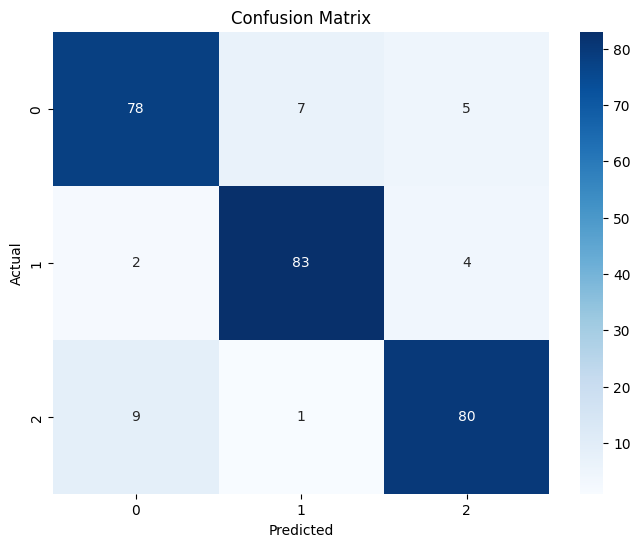

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        90
           1       0.91      0.93      0.92        89
           2       0.90      0.89      0.89        90

    accuracy                           0.90       269
   macro avg       0.90      0.90      0.90       269
weighted avg       0.90      0.90      0.90       269



In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), 
            yticklabels=np.unique(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(y_test, y_pred)
print(report)

ValueError: 'c' argument has 269 elements, which is inconsistent with 'x' and 'y' with size 1362.

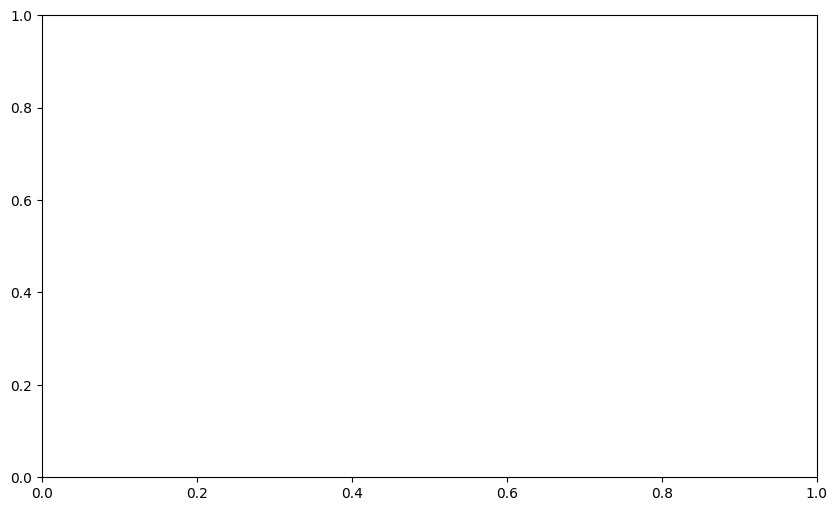

In [34]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolor='k')

# Adding a color bar to indicate class labels
plt.colorbar(scatter, label='Predicted Class')

# Adding labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Predictions')
plt.grid(True)
plt.show()

In [35]:
print(y_pred.shape)
print(x.shape[0])  # Should match the number of rows in x

(269,)
1362
